<h1 style="font-size:30px;"> Predicting urgency </h1>

<h3> Given the text in ticket predict its urgency. Essentially its a 4 class classification problem. </h3>

In [0]:
import pandas as pd
import numpy as np

<h2> 1. Data loading </h2>

In [2]:
fname = "all_tickets.csv"

df = pd.read_csv(fname)
df.head()

,title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact
0,NaN,hi since recruiter lead permission approve req...,1,4,2,21,71,3,4
1,connection with icon,icon dear please setup icon per icon engineers...,1,6,22,7,26,3,4
2,work experience user,work experience user hi work experience studen...,1,5,13,7,32,3,4
3,requesting for meeting,requesting meeting hi please help follow equip...,1,5,13,7,32,3,4
4,reset passwords for external accounts,re expire days hi ask help update passwords co...,1,4,2,76,4,3,4


<h2> 2. Data preprocessing </h2>

**Preprocessing involves:**

- Removing numbers & punctuations.
- Expanding words to their full form. E.g: "won't" >>> "will not"
- Removing stopwords.
- Lemmatizing: Transforming words back to their root form. E.g: "feet" >>> "foot"

In [0]:
# Importing libraries required for text preprocessing

import re    # Regex parsing
from nltk.corpus import stopwords   # For stopword removal
from nltk.stem import WordNetLemmatizer    # For stemming words

stops = stopwords.words("english")
lemmatizer = WordNetLemmatizer()

# Utilities for text preprocessing
def txt_preprocess(x):
    
    x = str(x).lower()
    
    # Replacing unwanted texts
    x = x.replace("′", "'")
    x = x.replace("’", "'")
    x = x.replace("won't", "will not")
    x = x.replace("cannot", "can not")
    x = x.replace("can't", "can not")
    x = x.replace("n't", " not")
    x = x.replace("what's", "what is")
    x = x.replace("it's", "it is")
    x = x.replace("'ve", " have")
    x = x.replace("i'm", "i am")
    x = x.replace("'re", " are")
    x = x.replace("he's", "he is")
    x = x.replace("she's", "she is")
    x = x.replace("'s", " own")
    x = x.replace("%", " percent ")
    x = x.replace("'ll", " will")
    
    # Tokenizing text
    words = x.split(" ")    
    # Removing stopwords
    words = [word for word in words if word not in stops]
    # Lemmatizing words,i.e , replace word with corresponding root word.
    words = [lemmatizer.lemmatize(word) for word in words]
    # Words containing only alphabets
    words = [word for word in words if word.isalpha()]
    # Joining the words back
    x = (" ").join(words)
    
    return x

In [4]:
df["body"] = df["body"].fillna("").apply(txt_preprocess)
df.head()

,title,body,ticket_type,category,sub_category1,sub_category2,business_service,urgency,impact
0,NaN,hi since recruiter lead permission approve req...,1,4,2,21,71,3,4
1,connection with icon,icon dear please setup icon per icon engineer ...,1,6,22,7,26,3,4
2,work experience user,work experience user hi work experience studen...,1,5,13,7,32,3,4
3,requesting for meeting,requesting meeting hi please help follow equip...,1,5,13,7,32,3,4
4,reset passwords for external accounts,expire day hi ask help update password colleag...,1,4,2,76,4,3,4


In [0]:
texts = df["body"]
labels = pd.get_dummies(df["urgency"]).values

<h2> 3. Preparing the data for training </h2>

<h3> 3.1 Text to integer encodings </h3>

Every word in a ticket-text is assigned an integer number.

In [7]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [0]:
training_samples = 44000
validation_samples = df.shape[0] - training_samples
maxlen = 50   # Median length being 20
maxwords = 10000

In [9]:
tokenizer = Tokenizer(num_words=maxwords)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index

print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen, padding="post")
data

Found 10486 unique tokens.


array([[   3,  196, 1781, ...,    0,    0,    0],
       [ 923,   14,    1, ...,    0,    0,    0],
       [  44,  605,   29, ...,    0,    0,    0],
       ...,
       [   8,   12,   18, ...,    0,    0,    0],
       [   8,   12,   18, ...,    0,    0,    0],
       [   6,    1,  132, ...,    0,    0,    0]], dtype=int32)

<h3> 3.2 Preparing the embedding matrix </h3>

I would be using GLoVE embeddings(GLobal VEctors) to convert each word into a n-dimensional vector. These vector representations contain co-occurence information,i.e, which words occur in the context or vicinity of another word. In this way they try to capture the meaning of a word, which helps the neural net to **"learn the meaning"** of a sentence/document.

![alt-text="Visualizing embeddings"](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/06/06062705/Word-Vectors.png)

The file can be downloaded from this link: https://nlp.stanford.edu/projects/glove/

In [10]:
embedding_dir = parent_dir + "glove.6B.100d.txt"
embedding_index = dict()  # Key: word, Value: embedding vector

# Opening the file containing GLoVe embeddings
f = open(embedding_dir, encoding='utf8')

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embedding_index[word] = coefs
f.close()

word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embed_size = 100
embedding_matrix = np.zeros((vocab_size, embed_size))
absent_words = 0

for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        # Words not found would be all zeros
        embedding_matrix[i] = embedding_vector
    else:
        print(word)
        absent_words += 1
        
print('Total absent words are', absent_words, 'which is', 
      "%0.2f" % (absent_words * 100 / len(word_index)), '% of total words')

timecard
nonrecoverable
intr
req
unapplied
unlinking
greyed
fulfiller
receipting
locomote
cooky
msec
updaters
rcpt
qty
keyset
retries
receipted
notifier
reseat
assignat
async
distr
inconsistences
convertor
inters
incase
transactor
resubmissions
sharable
promptitude
rebill
vised
allocable
reseating
homeworker
holydays
certes
celling
instr
automatize
cosec
fulfillers
engager
decapsulate
capacitate
rejecter
mistyping
limitative
unclarified
eely
yabber
recopy
sayst
subtask
troubleshot
scanter
vatic
connecter
reeving
itemization
automatization
recept
earnable
chestier
requestors
spited
reshaper
countersignature
coachers
staled
architecure
fetchers
deselect
plier
takeing
numerate
dumbs
etape
mktg
valuta
existents
builded
sherd
accessability
mistype
surger
adverted
belows
closuring
suppler
doest
bulleting
fallowed
handwrite
transferal
automatized
resoled
pragmatical
internality
incommode
insipidity
laten
demagnetized
trued
inutile
concatenate
roomer
snappiness
unbind
rebind
formating
curser
s

**There are 118 words for which no embedding were found , hence they would be represented by all zeros. To cope up for this loss we would set trainable=True in embedding layer, so that eventually during training the network learns semanic meaning of those words.**

<h2> 4. Train-Test split </h2>

In [0]:
np.random.seed(7)
indices = np.arange(data.shape[0])
np.random.shuffle(indices)

data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [0]:
# Sanity check
assert(x_train.shape[0] == y_train.shape[0])
assert(x_val.shape[0] == y_val.shape[0])

<h2> 5. Utility functions for performance visualization </h2>

In [0]:
# Importing necessary libraries 

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y,num_classes):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    plt.figure(figsize=(7,3))
    
    labels = [i for i in range(num_classes)]
    
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.show()

In [0]:
def plot_metrics(hist, num_epochs):
    """
    Compares accuracy & loss plots.
    """
  acc = hist.history["categorical_accuracy"]
  val_acc = hist.history["val_categorical_accuracy"]

  loss = hist.history["loss"]
  val_loss = hist.history["val_loss"]
  
  epochs = range(num_epochs)
  
  plt.figure(figsize=(10,7))
  
  plt.subplot(1,2,1)
  plt.plot(epochs, acc, 'b', label="Accuracy")
  plt.plot(epochs, val_acc, 'r', label="Validation Accuracy")
  plt.grid()
  plt.legend()
  
  plt.subplot(1,2,2)
  plt.plot(epochs, loss, 'b', label="Loss")
  plt.plot(epochs, val_loss, 'r', label="Validation Loss")
  plt.grid()
  plt.legend()  
  
  plt.show()

<h2> 6. Finding class weights </h2>

In [0]:
def flatten_one_hot(y_true):

  labels = []

  for one_hot_label in y_true:
    labels.append(np.argmax(one_hot_label))

  labels = np.array(labels)
  return labels

In [15]:
from sklearn.utils import class_weight

y_train_labels = flatten_one_hot(y_train)
class_weight = class_weight.compute_class_weight('balanced', np.unique(y_train_labels), y_train_labels)
class_weight

array([7.3284477 , 1.79533214, 2.20264317, 0.35056409])

<h2> 7. Training models </h2>

<h3> 7.1 Using LSTM</h3>

In [0]:
from keras.models import Sequential
from keras.layers import Embedding, CuDNNLSTM, Dense, SpatialDropout1D, GlobalMaxPooling1D, Dropout

In [18]:
e = Embedding(vocab_size, embed_size, weights=[embedding_matrix], input_length=50, trainable=True)
num_classes = 4

model1 = Sequential()
model1.add(e)
model1.add(SpatialDropout1D(0.2))
model1.add(CuDNNLSTM(64, return_sequences=True))
model1.add(GlobalMaxPooling1D())
model1.add(Dense(128, activation="relu"))
model1.add(Dropout(0.25))
model1.add(Dense(num_classes, activation="softmax", name="Output"))

model1.summary()

W0720 17:26:28.147691 139794065557376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0720 17:26:28.162376 139794065557376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0720 17:26:28.165158 139794065557376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0720 17:26:28.174320 139794065557376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0720 17:26:28.175426 1397940655

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 100)           1048700   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 50, 100)           0         
_________________________________________________________________
cu_dnnlstm_1 (CuDNNLSTM)     (None, 50, 64)            42496     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
Output (Dense)               (None, 4)                 516       
Total para

In [19]:
from keras.optimizers import Adam

model1.compile(optimizer=Adam(lr=1e-4),
             loss="categorical_crossentropy",
             metrics=["categorical_accuracy"])

W0720 17:26:31.787790 139794065557376 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [24]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

filename = 'baseline.h5'
num_epochs = 15
Batch_size = 128

es = EarlyStopping(monitor='val_loss', mode='min', baseline=0.2, verbose=1, patience=15)
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.5, patience=5)

# fit model
hist1 = model1.fit(x_train, y_train, epochs=num_epochs, batch_size=Batch_size, validation_data=(x_val,y_val), 
                 callbacks=[es,checkpoint,reduce_lr], verbose=1)

Train on 44000 samples, validate on 4549 samples
Epoch 1/15
44000/44000 [==============================] - 3s 69us/step - loss: 0.2527 - categorical_accuracy: 0.8824 - val_loss: 0.2858 - val_categorical_accuracy: 0.8670

Epoch 00001: val_loss improved from inf to 0.28577, saving model to baseline.h5
Epoch 2/15
44000/44000 [==============================] - 3s 59us/step - loss: 0.2510 - categorical_accuracy: 0.8830 - val_loss: 0.2906 - val_categorical_accuracy: 0.8679

Epoch 00002: val_loss did not improve from 0.28577
Epoch 3/15
44000/44000 [==============================] - 3s 59us/step - loss: 0.2492 - categorical_accuracy: 0.8838 - val_loss: 0.2897 - val_categorical_accuracy: 0.8683

Epoch 00003: val_loss did not improve from 0.28577
Epoch 4/15
44000/44000 [==============================] - 3s 59us/step - loss: 0.2484 - categorical_accuracy: 0.8847 - val_loss: 0.2902 - val_categorical_accuracy: 0.8696

Epoch 00004: val_loss did not improve from 0.28577
Epoch 5/15
44000/44000 [======

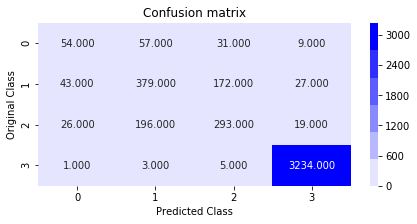

In [27]:
y_pred = model1.predict_classes(x_val)
y_test = flatten_one_hot(y_val)

plot_confusion_matrix(y_test, y_pred, 4)

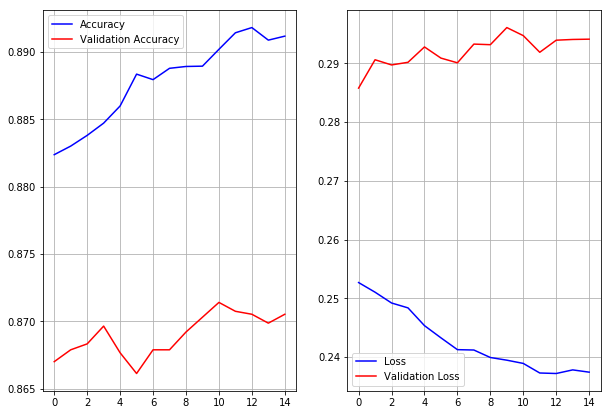

In [26]:
plot_metrics(hist1, num_epochs)

<h2> 7.2 Using Attention </h2>

A brief description of what attention does is : "Attention allows the model to focus on the relevant parts of the input sequence as needed."

![alt-text="Visualizing attention"](https://pic4.zhimg.com/v2-a2db0687ce55dcd2324e00851dd0426c_1200x500.jpg)

For more info one can visit this link: https://jalammar.github.io/visualizing-neural-machine-translation-mechanics-of-seq2seq-models-with-attention/ .
It contains a wonderful visual description of how attention works in case of mchine translation.

The following code from Attention class has been **stolen** from https://www.kaggle.com/suicaokhoailang/lstm-attention-baseline-0-672-lb.

In [0]:
from keras.models import Sequential,Model
from keras.layers import CuDNNLSTM, Dense, Bidirectional, Input,Dropout

from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints

In [0]:
# https://www.kaggle.com/qqgeogor/keras-lstm-attention-glove840b-lb-0-043
class Attention(Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3

        self.W = self.add_weight((input_shape[-1],),
                                 initializer=self.init,
                                 name='{}_W'.format(self.name),
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint)
        self.features_dim = input_shape[-1]

        if self.bias:
            self.b = self.add_weight((input_shape[1],),
                                     initializer='zero',
                                     name='{}_b'.format(self.name),
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint)
        else:
            self.b = None

        self.built = True

    def compute_mask(self, input, input_mask=None):
        return None
    
    def call(self, x, mask=None):
        features_dim = self.features_dim
        step_dim = self.step_dim

        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)),
                        K.reshape(self.W, (features_dim, 1))), (-1, step_dim))

        if self.bias:
            eij += self.b

        eij = K.tanh(eij)

        a = K.exp(eij)

        if mask is not None:
            a *= K.cast(mask, K.floatx())

        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())

        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0],  self.features_dim

In [33]:
e = Embedding(vocab_size, embed_size, weights=[embedding_matrix], input_length=50, trainable=True)
num_classes = 4

model3 = Sequential()
model3.add(e)
model3.add(SpatialDropout1D(0.2))
model3.add(Bidirectional(CuDNNLSTM(64,return_sequences=True)))
model3.add(Bidirectional(CuDNNLSTM(64,return_sequences=True)))
model3.add(Attention(50))  # 50 is the sequence length.
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.25))
model3.add(Dense(num_classes, activation="softmax", name="Output"))

model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 50, 100)           1048700   
_________________________________________________________________
spatial_dropout1d_3 (Spatial (None, 50, 100)           0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 50, 128)           84992     
_________________________________________________________________
bidirectional_3 (Bidirection (None, 50, 128)           99328     
_________________________________________________________________
attention_2 (Attention)      (None, 128)               178       
_________________________________________________________________
dense_3 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
__________

In [0]:
model3.compile(optimizer=Adam(lr=1e-4),
              loss="categorical_crossentropy",
              metrics=["categorical_accuracy"])

In [36]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

filename = 'attention.h5'
num_epochs = 20
Batch_size = 128

es = EarlyStopping(monitor='val_loss', mode='min', baseline=0.2, min_delta=0.0001, patience=20)
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.5, patience=5)

# fit model
hist3 = model3.fit(x_train, y_train, epochs=num_epochs, batch_size=Batch_size, validation_data=(x_val,y_val), 
                 class_weight=class_weight, callbacks=[es,checkpoint,reduce_lr], verbose=1)

Train on 44000 samples, validate on 4549 samples
Epoch 1/20
44000/44000 [==============================] - 6s 145us/step - loss: 0.2805 - categorical_accuracy: 0.8688 - val_loss: 0.3027 - val_categorical_accuracy: 0.8578

Epoch 00001: val_loss improved from inf to 0.30275, saving model to attention.h5
Epoch 2/20
44000/44000 [==============================] - 6s 140us/step - loss: 0.2805 - categorical_accuracy: 0.8675 - val_loss: 0.3189 - val_categorical_accuracy: 0.8578

Epoch 00002: val_loss did not improve from 0.30275
Epoch 3/20
44000/44000 [==============================] - 6s 140us/step - loss: 0.2758 - categorical_accuracy: 0.8709 - val_loss: 0.2966 - val_categorical_accuracy: 0.8611

Epoch 00003: val_loss improved from 0.30275 to 0.29660, saving model to attention.h5
Epoch 4/20
44000/44000 [==============================] - 6s 140us/step - loss: 0.2738 - categorical_accuracy: 0.8704 - val_loss: 0.2975 - val_categorical_accuracy: 0.8600

Epoch 00004: val_loss did not improve from

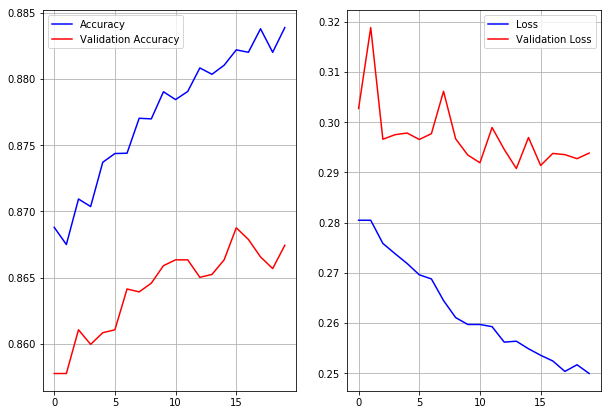

In [38]:
plot_metrics(hist3, num_epochs)

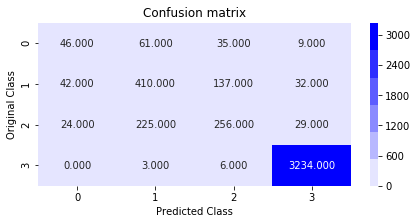

In [40]:
y_pred = model3.predict_classes(x_val)

plot_confusion_matrix(y_test, y_pred, 4)